<a href="https://colab.research.google.com/github/sinara08/Practice_Python/blob/main/numpy_and_pandas/Tasks/session_16_Series_tasks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###`Q-1:` Write a program to create an empty series.

In [1]:
# code here
import pandas as pd
 
# Creating empty series
ser = pd.Series()
ser

<ipython-input-1-3f95069ffd2b>:5: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  ser = pd.Series()


Series([], dtype: float64)

###`Q-2:` Write a Pandas program to add, subtract, multiple and divide two Pandas Series.

In [8]:
# code here
runs = [13,24,56,78,100]
add = [1,2,3,4,5]

r = pd.Series(runs)
a = pd.Series(add)
print(r + a)
print(r - a)
print(r * a)
print(r / a)
#runs.dtype()

0     14
1     26
2     59
3     82
4    105
dtype: int64
0    12
1    22
2    53
3    74
4    95
dtype: int64
0     13
1     48
2    168
3    312
4    500
dtype: int64
0    13.000000
1    12.000000
2    18.666667
3    19.500000
4    20.000000
dtype: float64


###`Q-3` Write a Pandas program to compare the elements of the two Pandas Series.
Sample Series: [2, 4, 6, 8, 10], [1, 3, 5, 7, 10]



In [9]:
# code here
a = [2, 4, 6, 8, 10]
b = [1, 3, 5, 7, 10]

print(a==b)
print(a>b)
print(a<b)

False
True
False


###`Q-5.`Write a function to change the data type of given a column or a Series. Function takes series and data type as input, returns the converted series.
```
series = pd.Series([1,2,'Python', 2.0, True, 100])
change to float type data
```
Note: Read about pd.to_numeric()

In [10]:
# code here
s = pd.Series([1,2,'Python', 2.0, True, 100])
pd.to_numeric(s, errors='coerce')

0      1.0
1      2.0
2      NaN
3      2.0
4      1.0
5    100.0
dtype: float64

Download data - https://drive.google.com/file/d/1LRhXwbEodeWXtzPhJCX0X9Lf_BECzvqb/view?usp=share_link
All Batsman runs series in IPL 2008 to 2022.

Below questions are based on this data.

###`Q-6` Find top 10 most run getter from the series.

In [13]:
# code here
batsman = pd.read_csv('/content/batsman_runs_series.csv')
batsman.head(10)

,batter,batsman_run
0,A Ashish Reddy,280
1,A Badoni,161
2,A Chandila,4
3,A Chopra,53
4,A Choudhary,25
5,A Dananjaya,4
6,A Flintoff,62
7,A Kumble,35
8,A Manohar,108
9,A Mishra,362


In [15]:
batsman.sort_values('batsman_run', ascending=False).head(10)

,batter,batsman_run
569,V Kohli,6634
462,S Dhawan,6244
130,DA Warner,5883
430,RG Sharma,5881
493,SK Raina,5536
27,AB de Villiers,5181
108,CH Gayle,4997
339,MS Dhoni,4978
452,RV Uthappa,4954
256,KD Karthik,4377


###`Q-7` No of players having runs above 3000

In [23]:
# code here
batsman[batsman['batsman_run'] > 3000].shape[0]

20

###`Q-8` No of players having runs above mean value?

In [28]:
# code here

batsman[batsman['batsman_run'] > batsman['batsman_run'].mean()].shape[0]

128

Download data - https://drive.google.com/file/d/1QZuZ5bypUInfVvarHACLAi8tXXHvb8xd/view?usp=share_link

file name - items.csv



###`Q-9` 
    i. Read `items.csv` making `item_name` as index.
    ii. Show no of nan values
    ii. Item price is given in $, so convert it to rupees without currency symbol.
    iii. Make data type of newly made series as float.
    iv. Fill nan with mean of the series


How csv file looks

```
item_name	item_price
Chips and Fresh Tomato Salsa	$2.39
Izze	$3.39
Nantucket Nectar	$3.39
Chips and Tomatillo-Green Chili Salsa	$2.39
Chicken Bowl	$16.98

```

In [52]:
# code here
items=pd.read_csv('/content/items (1).csv', index_col='item_name')
items

,item_price
item_name,
Chips and Fresh Tomato Salsa,$2.39
Izze,$3.39
Nantucket Nectar,$3.39
Chips and Tomatillo-Green Chili Salsa,$2.39
Chicken Bowl,$16.98
...,...
Steak Burrito,$11.75
Steak Burrito,$11.75
Chicken Salad Bowl,$11.25


In [34]:
items.isnull().sum()

item_price    50
dtype: int64

In [53]:
#items['item_price'].replace({"\$":''}, regex = True).apply(lambda x:x*80)

items['item_price'] = items['item_price'].replace({"\$":''}, regex = True).astype('float')
items['item_price'] = items['item_price'].apply(lambda x:x*80)
items['item_price']

item_name
Chips and Fresh Tomato Salsa              191.2
Izze                                      271.2
Nantucket Nectar                          271.2
Chips and Tomatillo-Green Chili Salsa     191.2
Chicken Bowl                             1358.4
                                          ...  
Steak Burrito                             940.0
Steak Burrito                             940.0
Chicken Salad Bowl                        900.0
Chicken Salad Bowl                        700.0
Chicken Salad Bowl                        700.0
Name: item_price, Length: 4622, dtype: float64

In [54]:
items['item_price'].fillna(items['item_price'].mean(), inplace=True)

###`Q-10`: 
    i. Find mean price
    ii. Find 30th and 6th percentile value
    iii. Plot Histogram on price with bin size 50
    iv. No of items price lies between [1000 to 2000]



In [55]:
# code here
items['item_price'].mean()

597.0425196850393

In [56]:
items['item_price'].quantile(.3)

356.0

In [57]:
items['item_price'].quantile(.06)

100.0

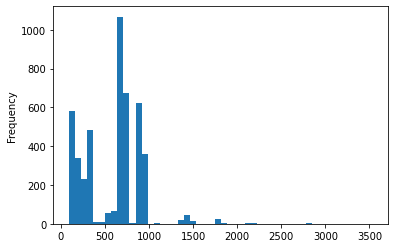

In [58]:
items['item_price'].plot(kind='hist', bins=50)

In [62]:
items[items['item_price'].between(1000,2000)].size

116